<a href="https://colab.research.google.com/github/fyemane/TensorFlow-ZTM-/blob/main/02_neural_network_classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural network classification with TensorFlow

In this notebook we're going to learn how to write neural networks for classification problems.

A classification is where you try to classify something as one thing or another.

A few types of classification problems:
* Binary classification
* Multiclass classification
* Multilabel classification

### Creating and viewing classification data to model

Creating data to view and fit


In [ ]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [ ]:
# Check out the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is a little hard to understand right now.. let's visualize it!

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [ ]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

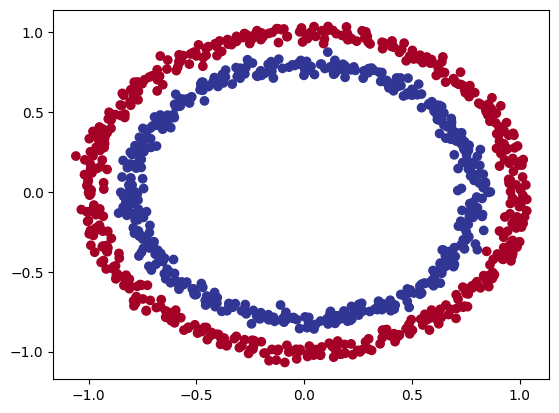

In [ ]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

**Exercise:** Before pushing forward, spend 10 minutes playing around with [TensoFlow Playground](https://playground.tensorflow.org/). See what happens when you change different hyperparameters.

## Checking the input and output shapes of our classification data

In [ ]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# How many samples we're working
len(X), len(y)

(1000, 1000)

In [ ]:
# View the first example of features and labels
X[1], y[1]

(array([-0.75615888,  0.15325888]), 1)

## Building a not very good classification model with TensorFlow

The steps in modelling with TensorFlow are typically:
1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate...

In [ ]:
# Import TensorFlow
import tensorflow as tf
tf.__version__

'2.15.0'

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 4s 3ms/step - loss: 4.7786 - accuracy: 0.4720
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 4.8589 - accuracy: 0.5400
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 4.7715 - accuracy: 0.5320
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 4.7747 - accuracy: 0.5340
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 4.7475 - accuracy: 0.5340


In [ ]:
# Let's try and improve our model by training for longer...
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000


[7.6246185302734375, 0.5]

Since we're working on a binary classification problem and our model is getting around ~50% accuracy... it's performing as if it's guessing.

So let's step things up a notch and add an extra layer.


In [ ]:
# Set the random sed
tf.random.set_seed(42)

# 1. Create a model, this time with 2 layers
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

In [ ]:
# 4. Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.5000


[0.69333815574646, 0.5]

## Trying to improve our not very good classification model

Let's look into our bag of tricks to see how we can improve our model.
1. Creating a model - we might want to add more layers or increase the number of hidden units within a layer.
2. Compiling a model - here we might want to choose a different optimization function such as Adam instead of SGD.
3. Fitting a model - perhaps we might fit our model for more epochs (leave it training for longer).

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), # Add 100 dense neurons
    tf.keras.layers.Dense(10), # add another layer with 10 neurons
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

In [ ]:
# 4. Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6976 - accuracy: 0.5140


[0.6975572109222412, 0.5139999985694885]

## Creating a function to view our model's not so good predictions

**Note:** Whenever your model is performing strangely or there's something going on with your data you're not quite sure of, remember these three words: **visualize, visualize, visualize**. Inspect your data, inspect your model, inspect your model's predictions.

To visualize our model's predictions, let's create a function `plot_decision_boudnary()`, this function will:
* Take in a trained model, features (X) and labels (y)
* Create a [meshgrid](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls)

In [ ]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plot the decision boundary created by a model predicting on X.
  This function was inspired by two resources:
  1. https://cs231n.github.io/neural-networks-case-study/
  2. https://github.com/GokuMohandas/Made-With-ML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of each plot and create a meshgrid
  # https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X value (we're going to make predictions on these)
  # https://numpy.org/doc/stable/reference/generated/numpy.c_.html
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    # We have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 2ms/step
doing binary classification


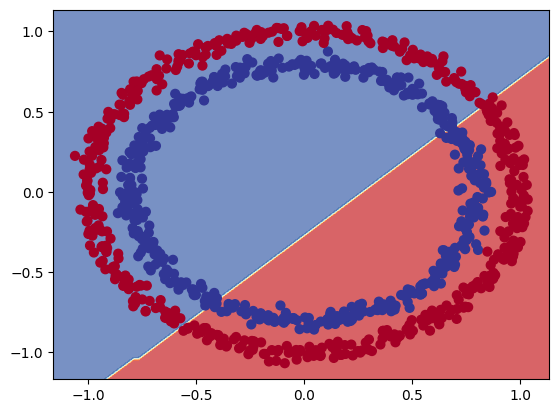

In [ ]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_3, X=X, y=y)

## Make our poor classification model work for a regression dataset


In [ ]:
# Let's see if our model can be used for a regression problem...

# Setup random seed
tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X + 100

# Split our regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the regression data
# model_3.fit(X_reg_train, y_reg_train, epochs=100)

Oh wait... we compiled our model for a binary classification problem.

But... we're now working on a regression problem, let's change the model to suit our data.

In [ ]:
# Setup random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model, this time with Adam
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 6ms/step - loss: 543.2181 - mae: 543.2181
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 409.4954 - mae: 409.4954
Epoch 3/100
5/5 [==============================] - 0s 5ms/step - loss: 281.9467 - mae: 281.9467
Epoch 4/100
5/5 [==============================] - 0s 7ms/step - loss: 150.4242 - mae: 150.4242
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 52.3695 - mae: 52.3695
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 90.4972 - mae: 90.4972
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 79.1947 - mae: 79.1947
Epoch 8/100
5/5 [==============================] - 0s 5ms/step - loss: 45.6541 - mae: 45.6541
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 53.6242 - mae: 53.6242
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 43.2184 - mae: 43.2184
Epoch 11/100
5/5 [==============================] -

2/2 [==============================] - 0s 5ms/step


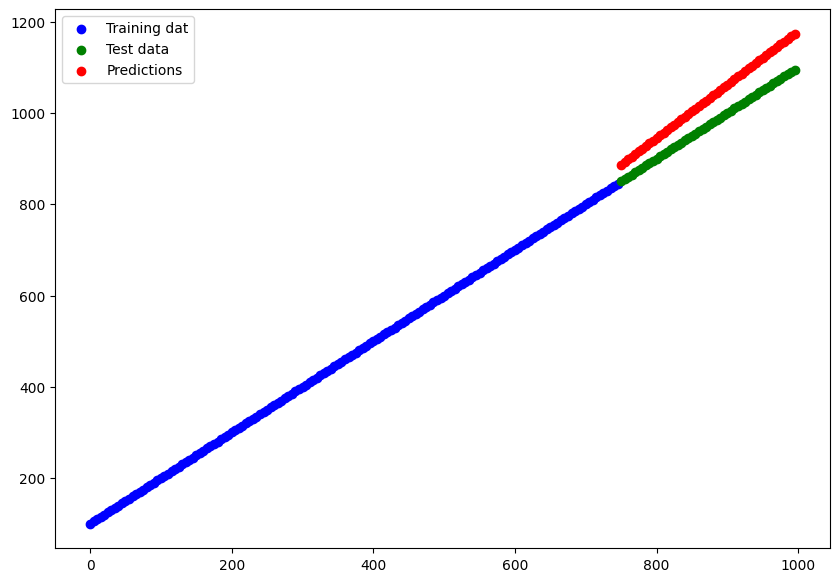

In [ ]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training dat")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend()

## Non-linearity

### Part 1: Straight lines and non-straight lines

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# 2. Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 4ms/step - loss: 4.2880 - accuracy: 0.4310
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 4.2353 - accuracy: 0.4410
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 4.1927 - accuracy: 0.4450
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 4.1076 - accuracy: 0.4480
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 4.0252 - accuracy: 0.4580
Epoch 6/100
32/32 [==============================] - 0s 5ms/step - loss: 4.0087 - accuracy: 0.4580
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 4.0023 - accuracy: 0.4610
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 3.9442 - accuracy: 0.4640
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 3.8258 - accuracy: 0.4670
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 3.6943 - accuracy: 0.4660
Epoch 11/

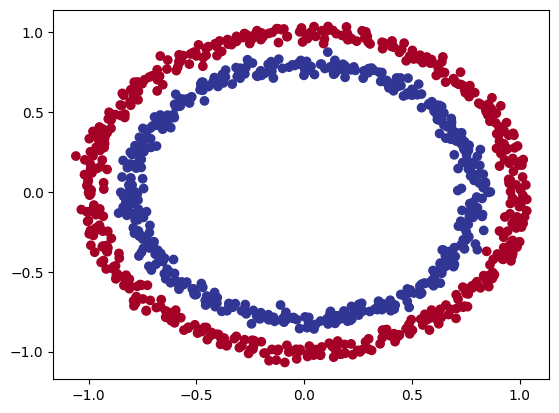

In [ ]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

313/313 [==============================] - 1s 2ms/step
doing binary classification


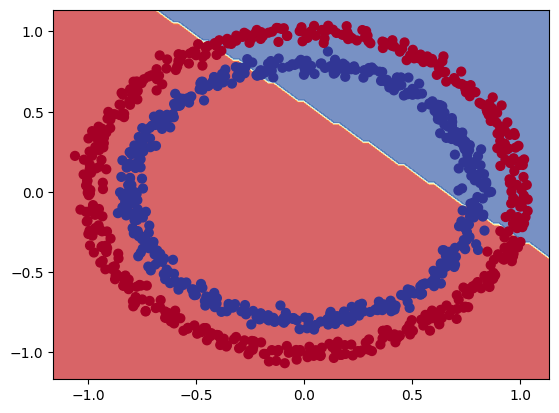

In [ ]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_4, X=X, y=y)

### Part 2: Building our first neural network with non-linear activation function

Let's try to build our first neural network with a non-linear activation function.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model with a non-linear activation function
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

# 2. Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 4ms/step - loss: 6.2599 - accuracy: 0.4860
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 6.2533 - accuracy: 0.4860
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 6.2523 - accuracy: 0.4870
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 6.2513 - accuracy: 0.4860
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 6.2421 - accuracy: 0.4860
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 6.2289 - accuracy: 0.4850
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 6.2278 - accuracy: 0.4850
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 6.2268 - accuracy: 0.4850
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 6.2259 - accuracy: 0.4850
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 6.2163 - accuracy: 0.4860
Epoch 11/

### Part 3: Upgrading our non-linear model with more layers

In [ ]:
# Time to replicate the multi-layer neural network from TensorFlow playground

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_6.fit(X, y, epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 4ms/step - loss: 4.6228 - accuracy: 0.5000
Epoch 2/250
32/32 [==============================] - 0s 4ms/step - loss: 3.3522 - accuracy: 0.5000
Epoch 3/250
32/32 [==============================] - 0s 4ms/step - loss: 2.6491 - accuracy: 0.5000
Epoch 4/250
32/32 [==============================] - 0s 4ms/step - loss: 2.3048 - accuracy: 0.5000
Epoch 5/250
32/32 [==============================] - 0s 4ms/step - loss: 2.0437 - accuracy: 0.5000
Epoch 6/250
32/32 [==============================] - 0s 5ms/step - loss: 1.2140 - accuracy: 0.4870
Epoch 7/250
32/32 [==============================] - 0s 5ms/step - loss: 1.0377 - accuracy: 0.4690
Epoch 8/250
32/32 [==============================] - 0s 5ms/step - loss: 1.0174 - accuracy: 0.4610
Epoch 9/250
32/32 [==============================] - 0s 5ms/step - loss: 0.9997 - accuracy: 0.4560
Epoch 10/250
32/32 [==============================] - 0s 5ms/step - loss: 0.9836 - accuracy: 0.4540
Epoch 11/

In [ ]:
# Evaluate the model
model_6.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.3514 - accuracy: 0.8100


[0.35139140486717224, 0.8100000023841858]

313/313 [==============================] - 1s 2ms/step
doing binary classification


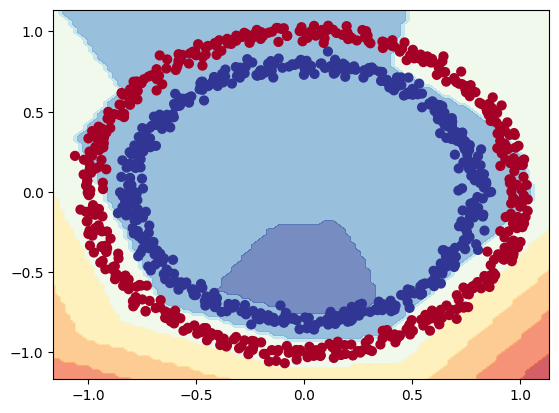

In [ ]:
# How do our model predictions look like?
plot_decision_boundary(model_6, X, y)

### Part 4: Modelling our non-linear data once and for all

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_7.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 2s 6ms/step - loss: 0.6941 - accuracy: 0.5230
Epoch 2/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6937 - accuracy: 0.5010
Epoch 3/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6933 - accuracy: 0.4950
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6930 - accuracy: 0.5040
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6927 - accuracy: 0.4900
Epoch 6/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6925 - accuracy: 0.4870
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6921 - accuracy: 0.5130
Epoch 8/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6919 - accuracy: 0.5120
Epoch 9/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6916 - accuracy: 0.5180
Epoch 10/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6913 - accuracy: 0.5140
Epoch 11/

In [ ]:
# 4. Evaluate the model
model_7.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.4066 - accuracy: 0.8480


[0.4065732955932617, 0.8479999899864197]

313/313 [==============================] - 1s 2ms/step
doing binary classification


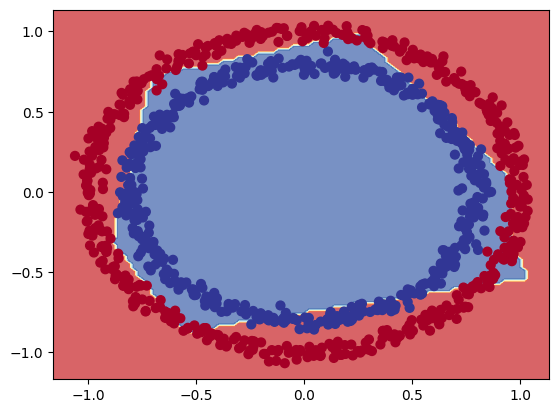

In [ ]:
# Let's visualize our incredible metrics
plot_decision_boundary(model_7, X, y)

**Question:** What's wrong with the predictions we've made? Are we really evaluating our model correctly? Hint: what data did the model learn on and what data did we predict on?

**Note:** The combination of **linear (straight lines) and non-linear (non-straight lines) functions** is one of the key fundamentals of neural networks.

Now we've discussed the concept of linear, and non-linear functions (or lines), let's see them in action.

### Part 5: Replicating non-linear activation functions from scratch

Resource on activation functions:
https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html

In [ ]:
# Create a toy tensor (similar to the data we pass into our models)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

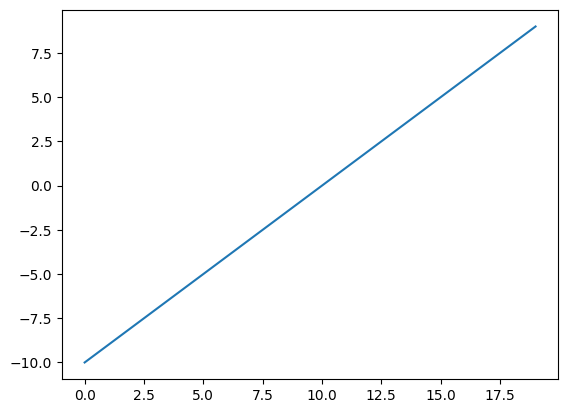

In [ ]:
# Visualize our toy tensor
plt.plot(A);

In [ ]:
# Let's start by replicating sigmoid - sigmoid(x) = 1 / (1 + exp(-x))
# https://www.tensorflow.org/api_docs/python/tf/keras/activations/sigmoid
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397868e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726230e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105854e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

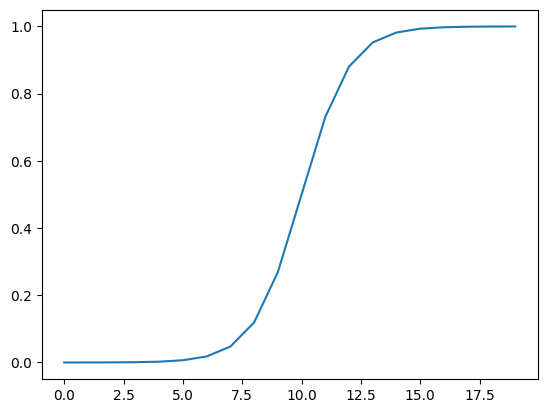

In [ ]:
# Plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A));

In [ ]:
# Let's recreate the relu function
# https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu
def relu(x):
  return tf.maximum(0, x)

# Let's pass our toy tensor to our custom relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

In [ ]:
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

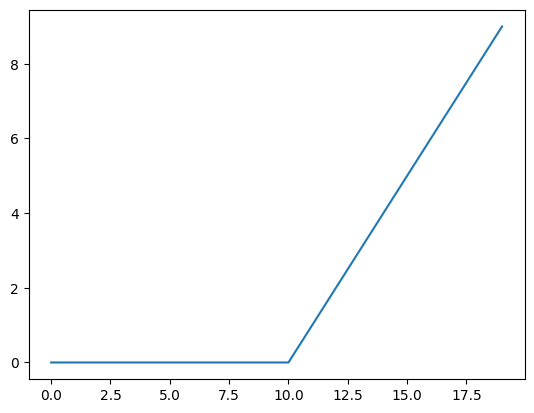

In [ ]:
# Plot ReLU modified tensor
plt.plot(relu(A));

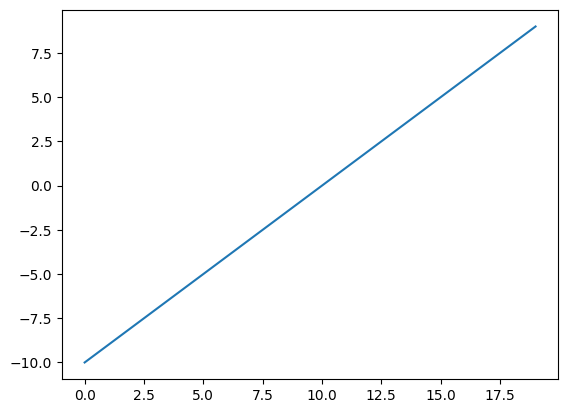

In [ ]:
plt.plot(A);

In [ ]:
# Let's try the linear activation function
# https://www.tensorflow.org/api_docs/python/tf/keras/activations/linear
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

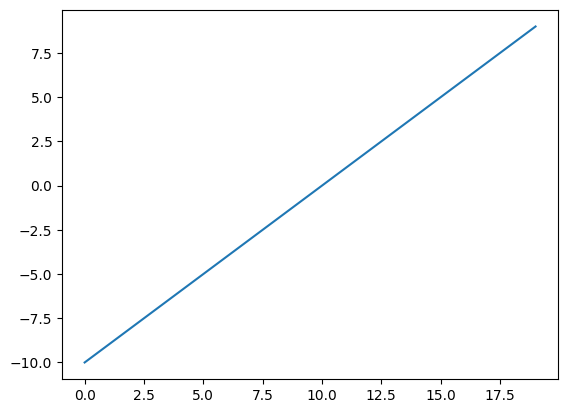

In [ ]:
# Does the linear activation function change anything?
plt.plot(tf.keras.activations.linear(A));

In [ ]:
# Does A even change?
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

## Getting great results in less time by tweaking the learning rate

So far we've been training and testing on the same dataset...

However, in machine learning this is basically a sin.

So let's create a training and test set.


In [ ]:
# Check how many examples we have
len(X), len(y)

(1000, 1000)

In [ ]:
# Split into train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [ ]:
# Let's recreate a model to fit on the training data and evaluate on the testing data

# Set random seed
tf.random.set_seed(42)

# 1. Create the model (same as model_7)
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

# 3. Fit the model
history = model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 5ms/step - loss: 0.7010 - accuracy: 0.5100
Epoch 2/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6845 - accuracy: 0.5113
Epoch 3/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6735 - accuracy: 0.5512
Epoch 4/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6641 - accuracy: 0.6050
Epoch 5/25
25/25 [==============================] - 0s 5ms/step - loss: 0.6555 - accuracy: 0.5813
Epoch 6/25
25/25 [==============================] - 0s 5ms/step - loss: 0.6441 - accuracy: 0.6263
Epoch 7/25
25/25 [==============================] - 0s 5ms/step - loss: 0.6313 - accuracy: 0.6438
Epoch 8/25
25/25 [==============================] - 0s 5ms/step - loss: 0.6207 - accuracy: 0.6587
Epoch 9/25
25/25 [==============================] - 0s 5ms/step - loss: 0.6039 - accuracy: 0.6787
Epoch 10/25
25/25 [==============================] - 0s 5ms/step - loss: 0.5847 - accuracy: 0.7100
Epoch 11/25
25/25 [

In [ ]:
# 4. Evaluate the model on the test dataset
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.1408 - accuracy: 0.9950


[0.1408086121082306, 0.9950000047683716]

313/313 [==============================] - 1s 2ms/step
doing binary classification
313/313 [==============================] - 1s 2ms/step
doing binary classification


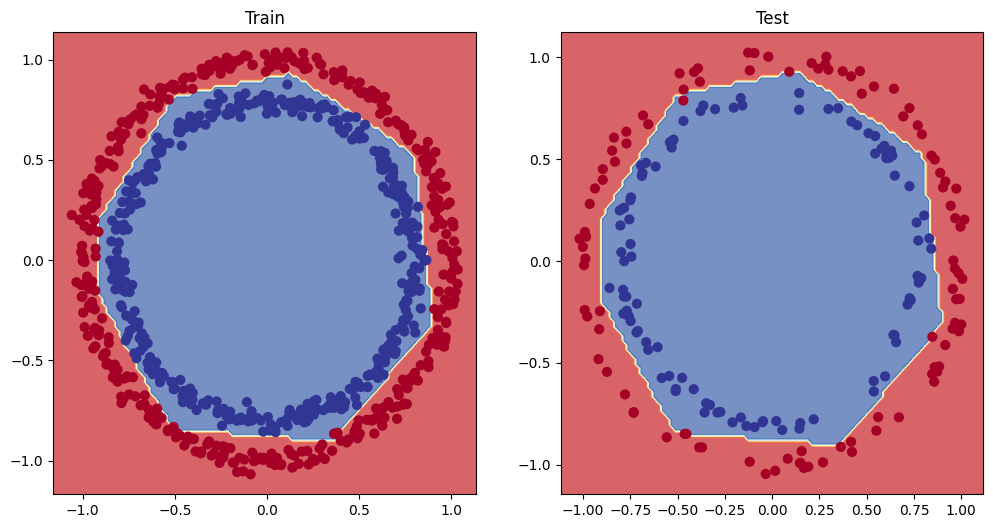

In [ ]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show();

## Using the TensorFlow History object to plot a model's loss curve

Plot the loss (or training) curves.
https://www.tensorflow.org/api_docs/python/tf/keras/Model


In [ ]:
# Convert the history object into a DataFrame
pd.DataFrame(history.history)

,loss,accuracy
0,0.701003,0.51000
1,0.684483,0.51125
2,0.673515,0.55125
3,0.664051,0.60500
4,0.655525,0.58125
5,0.644106,0.62625
6,0.631327,0.64375
7,0.620667,0.65875
8,0.603950,0.67875
9,0.584705,0.71000


Text(0.5, 1.0, 'Model_8 loss curves')

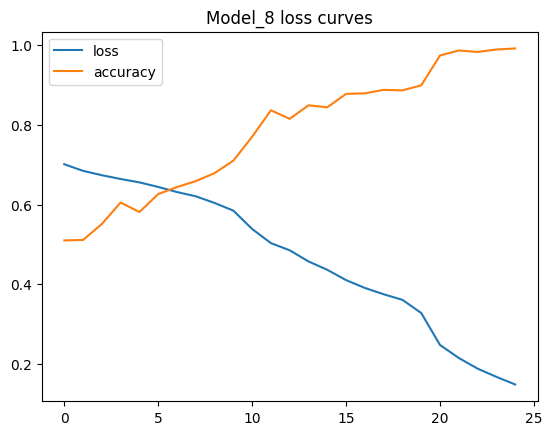

In [ ]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves")

**Note:** For many problems, the loss function going down means the model is improving (the predictions it's making are getting closer to the ground truth labels).

##  Using callbacks to find a model's ideal learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:
* A learning rate **callback** - you can think of a callback as an extra piece of functionality, you can add to your model *while* it's training.
  * Every epoch, if we put in some functionality to change the learning rate, the callback will give the optimizer the updated learning rate.
* Another model (we could use the same one as above, but we're practicing building models here)
* A modified loss curves plot.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_8)
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_9.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4 * 10**(epoch/20))

# Fit the model (passing lr_scheduler callback)
history_9 = model_9.fit(X_train,
                        y_train,
                        epochs=100,
                        callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.8037 - accuracy: 0.5175 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7990 - accuracy: 0.5175 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7939 - accuracy: 0.5188 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7885 - accuracy: 0.5175 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7825 - accuracy: 0.5213 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7762 - accuracy: 0.5263 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7697 - accuracy: 0.5275 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7628 - accuracy: 0.5275 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss:

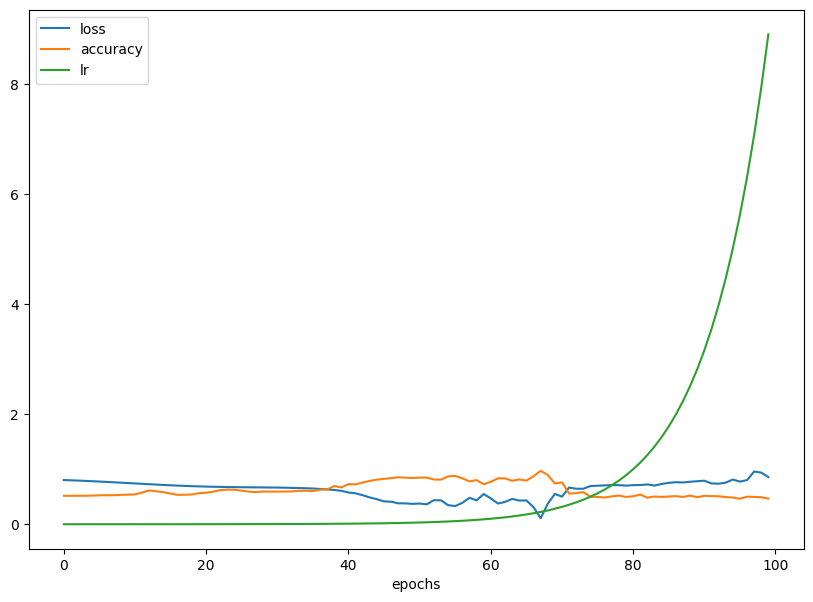

In [ ]:
# Checkout the history
pd.DataFrame(history_9.history).plot(figsize=(10, 7), xlabel="epochs");

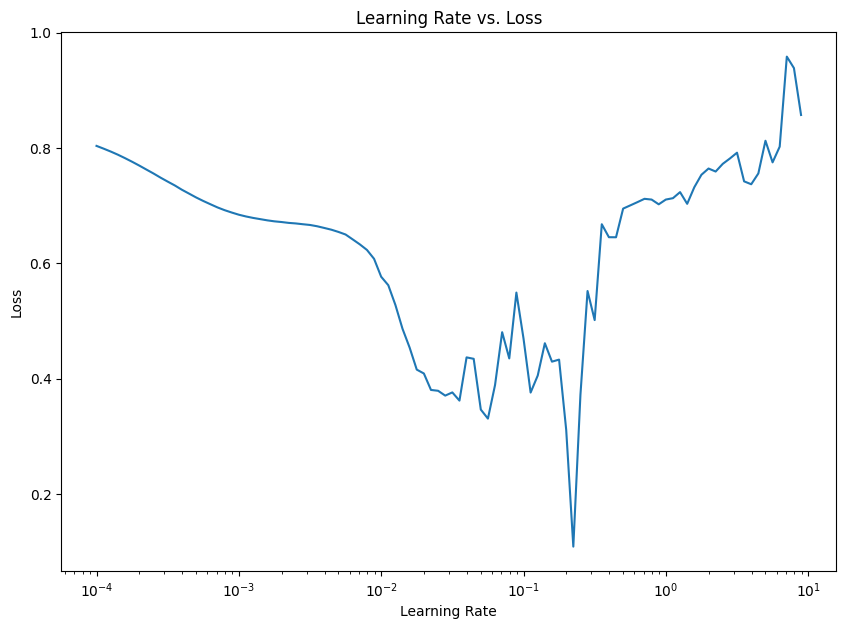

In [ ]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs. Loss");

In [ ]:
# Examples of other typical learning rate values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

## Training and evaluating a model with an ideal learning rate

In [ ]:
# Let's try using a higher *ideal* learning rate with the same model

# Set random seed
tf.random.set_seed(42)

# Create the model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model with the ideal learning rate
model_10.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                 metrics=["accuracy"])

# Fit the model for 20 epochs (5 less than before)
history_10 = model_10.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 3ms/step - loss: 0.6985 - accuracy: 0.4825
Epoch 2/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6825 - accuracy: 0.5638
Epoch 3/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6707 - accuracy: 0.5550
Epoch 4/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6546 - accuracy: 0.5950
Epoch 5/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6335 - accuracy: 0.6338
Epoch 6/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6092 - accuracy: 0.6425
Epoch 7/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5892 - accuracy: 0.6787
Epoch 8/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5783 - accuracy: 0.6775
Epoch 9/20
25/25 [==============================] - 0s 4ms/step - loss: 0.5811 - accuracy: 0.6850
Epoch 10/20
25/25 [==============================] - 0s 4ms/step - loss: 0.5542 - accuracy: 0.6988
Epoch 11/20
25/25 [

In [ ]:
# Evaluate model 10 on the test dataset
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.3384 - accuracy: 0.8700


[0.3384004831314087, 0.8700000047683716]

In [ ]:
# Evaluate model 8 on the test dataset
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1408 - accuracy: 0.9950


[0.1408086121082306, 0.9950000047683716]

313/313 [==============================] - 1s 2ms/step
doing binary classification
313/313 [==============================] - 1s 3ms/step
doing binary classification


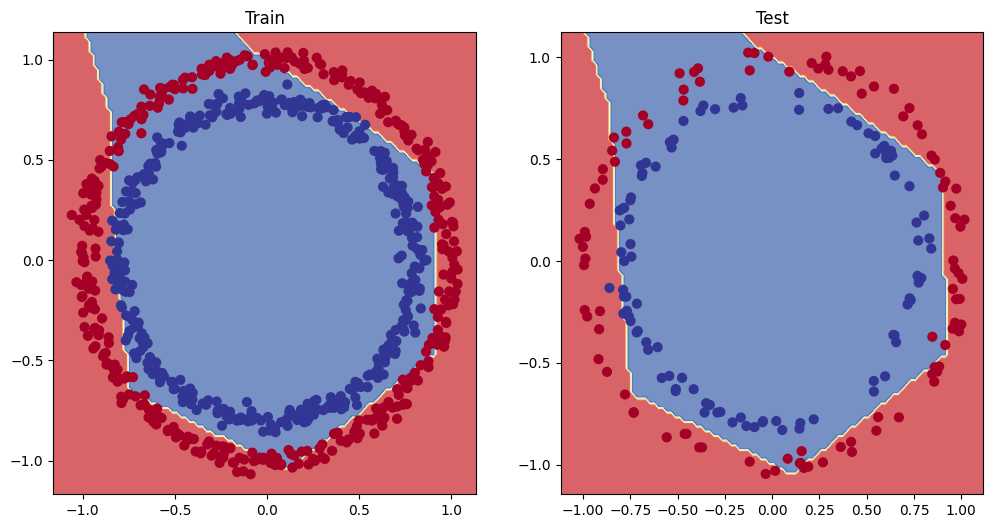

In [ ]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=y_test)
plt.show();

## More classification evaluation methods

Alongside visualizing our models' results as much as possible, there are a handful of other classification evaluation methods & metrics you should be familiar with:
* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report (from scikit-learn) https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

 ### Finding the accuracy of our classification model

In [ ]:
# Check the accuarcy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 3ms/step - loss: 0.3384 - accuracy: 0.8700
Model loss on the test set: 0.3384004831314087
Model accuracy on the test set: 87.00%


In [ ]:
## Creating our first confusion matrix (to see where our model is getting confused

### Creating our first confusion matrix (to see where our model is getting confused)

How about a confusion matrix?
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [ ]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(X_test)

# Create confusion matrix
# confusion_matrix(y_test, y_preds) # will create ValueError

7/7 [==============================] - 0s 2ms/step


In [ ]:
y_test[:10] # in binary form

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [ ]:
y_preds[:10] # in continuous form

array([[0.81975824],
       [0.81975824],
       [0.77419466],
       [0.81975824],
       [0.02978797],
       [0.00343009],
       [0.81975824],
       [0.81975824],
       [0.81975824],
       [0.5302308 ]], dtype=float32)

Oops... looks like our predictions array has come out in **prediction probability** form.. the standard output from the sigmoid (or softmax) activation functions.

In [ ]:
# Convert our prediction probabilities to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)>

In [ ]:
# Create a confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[77, 24],
       [ 2, 97]])

### Making our confusion matrix prettier

How about we prettify our confusion matrix?


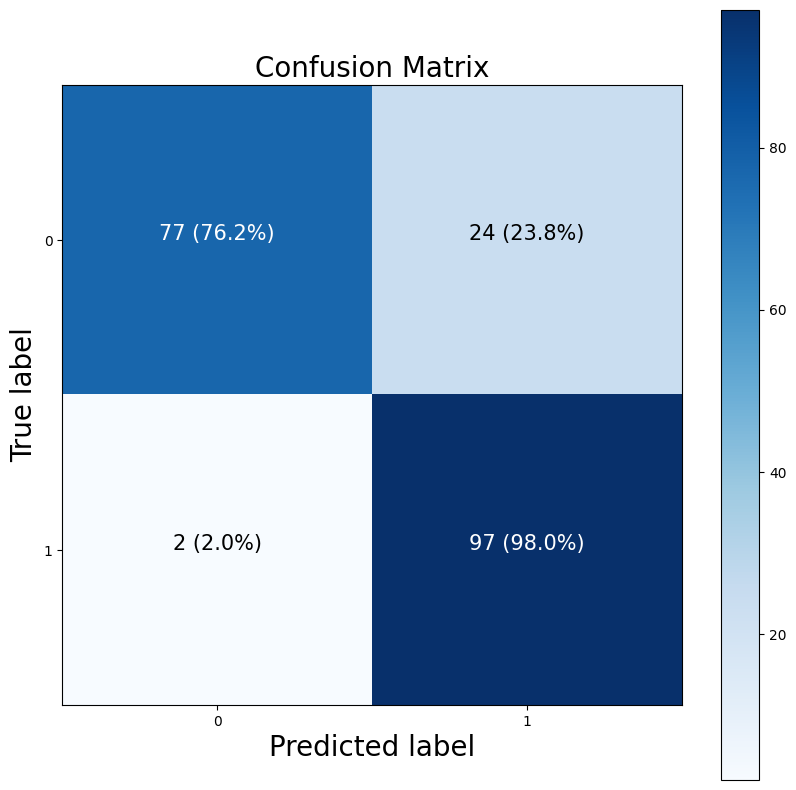

In [ ]:
# Note: the confusion matrix code we're about to write is a remix of scikit-learn's plot_confusion_matrix function
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)

# Create a matrix plot
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.matshow.html
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# Set the threshold for different colors
threshold = (cm.max() + cm.min()) / 2

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)


## Putting things together with multi-class classification


When you have more than two classes as an option, it's known as **multi-class classification**.
* This means if you have 3 different classes, it's multi-class classification.
* It also means if you have 100 different classes, it's multi-class classification.

To practice multi-class classification, we're going to build a neural network to classifiy images of different items of clothing.

https://www.tensorflow.org/datasets/catalog/fashion_mnist
https://github.com/zalandoresearch/fashion-mnist

### Part 1: Getting the data

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [ ]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

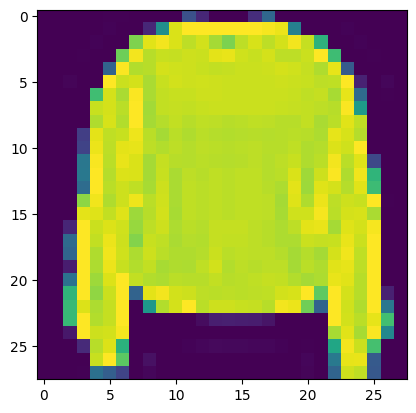

In [ ]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[7]);

In [ ]:
# Check out samples labels
train_labels[7]

2

### Part 2: Becoming one with the data

In [ ]:
# Create a small list so we can index onto our training labels so they're human-readable
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
len(class_names)

10

Text(0.5, 1.0, 'Sneaker')

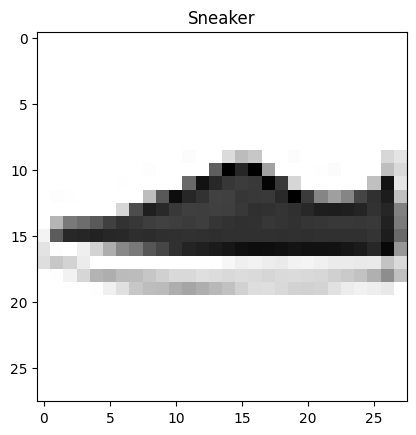

In [ ]:
# Plot an example image and its label
index_of_choice = 20000
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary) # binary color map for grayscale
plt.title(class_names[train_labels[index_of_choice]])

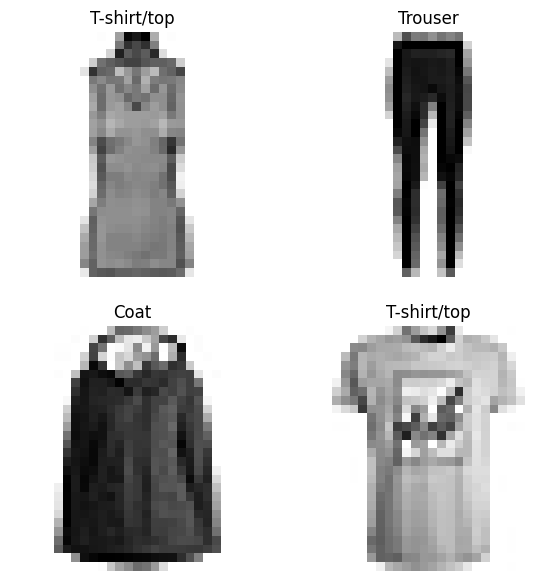

In [ ]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

### Part 3: Building a multi-class classification model

For our multiclass classification model, we can use a similar architecture to our binary classifiers, however, we're going to have to tweak a few things:
* Input shape = 28 x 28 (the shape of one image)
* Output shape = 10 (one per class of clothing)
* Loss function = `tf.keras.losses.CategoricalCrossentropy()` https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy
  * If your labels are one-hot encoded, use `CategoricalCrossentropy()`
  * If your labels are not one-hot encoded, use `SparseCategoricalCrossentropy()`
  * We expect labels to be provided in a one_hot representation. If you want to provide labels as integers, please use `SparseCategoricalCrossentropy` loss. There should be # classes floating point values per feature.


* Ouput layer activation = softmax (not sigmoid)

In [ ]:
# Input shape and output shape
train_data[0].shape, len(class_names)

((28, 28), 10)

In [ ]:
tf.one_hot(train_labels[:10], depth=10)

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)>

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
    # https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# Compile the model
model_11.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_11.fit(train_data,
                                tf.one_hot(train_labels, depth=10),
                                epochs=10,
                                # model evaluates found patterns on val data
                                validation_data=(test_data, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 2.3504 - accuracy: 0.0983 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0985 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy

In [ ]:
# Our data needs to be flattened (from 28*28 to None, 784)
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28))])
flatten_model.output_shape

(None, 784)

### Part 4: Improving performance with normalisation

In [ ]:
model_11.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_26 (Dense)            (None, 4)                 3140      
                                                                 
 dense_27 (Dense)            (None, 4)                 20        
                                                                 
 dense_28 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer data to be scaled (or normalized), this means they like to have the numbers in the tensors they try to find patterns in between 0 & 1.

In [ ]:
# We can get our training and test data between 0 & 1 by dividing by the maximum
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# check the min and max values of the scaled training data
train_data_norm.min(), test_data_norm.max()

(0.0, 1.0)

In [ ]:
# Now our data is normalized, let's build a model to find patterns in it

# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_11)
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
norm_history = model_12.fit(train_data_norm,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.1537 - accuracy: 0.5641 - val_loss: 0.7648 - val_accuracy: 0.7518
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6831 - accuracy: 0.7734 - val_loss: 0.6585 - val_accuracy: 0.7785
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6181 - accuracy: 0.7900 - val_loss: 0.6239 - val_accuracy: 0.7865
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5895 - accuracy: 0.7970 - val_loss: 0.6093 - val_accuracy: 0.7917
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5739 - accuracy: 0.8013 - val_loss: 0.5953 - val_accuracy: 0.7949
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5618 - accuracy: 0.8045 - val_loss: 0.5983 - val_accuracy: 0.7932
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5527 - accuracy: 0.8071 - val_loss: 0.5998 - val_accuracy:

**Note:** Neural networks tend to prefer data in numerical form as well as scaled/normalized (numbers between 0 and 1).

### Part 5: Comparing normalised and non-normalised data

<Axes: title={'center': 'Normalized data'}>

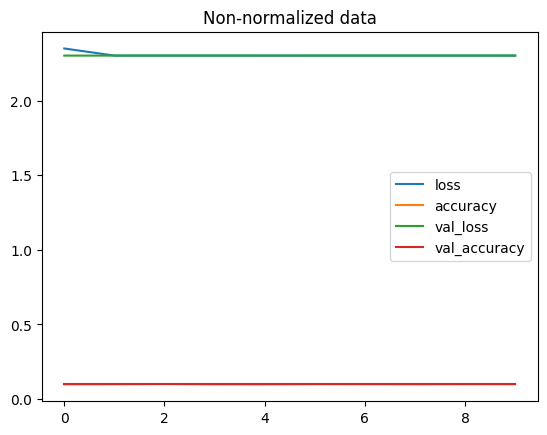

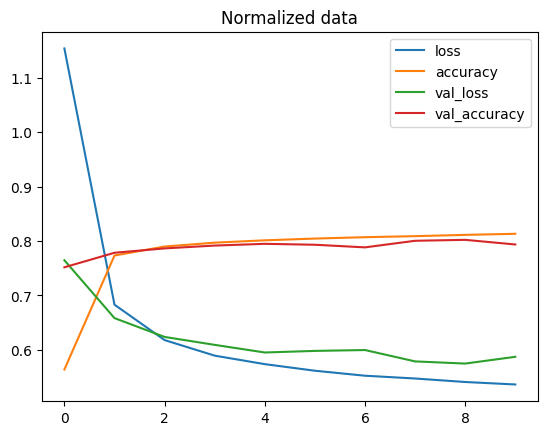

In [ ]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data")
# Plot noramlized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data")

**Note:** The same model with even *slightly* different data can produce *dramatically* different results. So when you're comparing models, it's important to make sure you're comparing them on the same criteria (e.g., same architecture but different data or same data but different architecture).

### Part 6: Finding the ideal learning rate

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))
find_lr_history = model_13.fit(train_data_norm,
                               train_labels,
                               epochs=40,
                               validation_data=(test_data_norm, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 8s 4ms/step - loss: 1.4162 - accuracy: 0.4340 - val_loss: 1.0529 - val_accuracy: 0.6070 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.9498 - accuracy: 0.6493 - val_loss: 0.9079 - val_accuracy: 0.6619 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8657 - accuracy: 0.6773 - val_loss: 0.8562 - val_accuracy: 0.6825 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 8s 4ms/step - loss: 0.8311 - accuracy: 0.6904 - val_loss: 0.8277 - val_accuracy: 0.6931 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8103 - accuracy: 0.6988 - val_loss: 0.8157 - val_accuracy: 0.7010 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7943 - accuracy: 0.7046 - val_loss: 0.8147 - val_accuracy: 0.7036 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 7s

Text(0.5, 1.0, 'Finding the ideal learning rate')

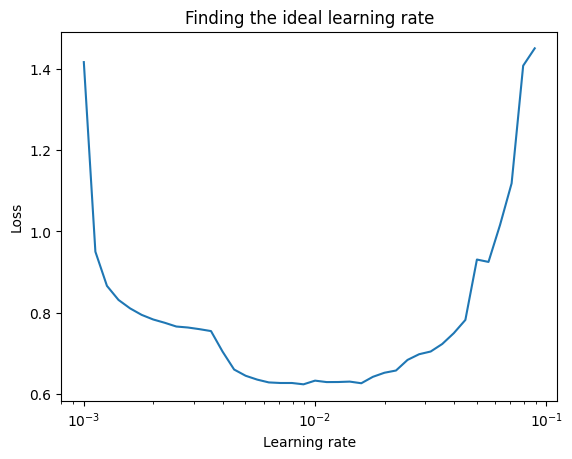

In [ ]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [ ]:
# Let's refit a model with the ideal learning rate

# Set random seed
tf.random.set_seed(42)

# Create model
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=["accuracy"])

# Fit the model
history_14 = model_14.fit(train_data_norm,
                          train_labels,
                          epochs=20,
                          validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 1.2552 - accuracy: 0.5243 - val_loss: 0.7815 - val_accuracy: 0.7094
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7281 - accuracy: 0.7340 - val_loss: 0.7154 - val_accuracy: 0.7496
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6702 - accuracy: 0.7621 - val_loss: 0.6803 - val_accuracy: 0.7665
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6438 - accuracy: 0.7731 - val_loss: 0.6548 - val_accuracy: 0.7773
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6286 - accuracy: 0.7782 - val_loss: 0.6490 - val_accuracy: 0.7737
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6168 - accuracy: 0.7829 - val_loss: 0.6560 - val_accuracy: 0.7726
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6102 - accuracy: 0.7859 - val_loss: 0.6496 - val_accuracy:

### Part 7: Evaluating our model

To evaluate our multi-class classification model, we could:
* Evaluate its performance using other classification metrics (such as a confusion matrix)
* Assess some of its predictions (through visualizations)
* Improve its results (by training it for longer or changing the architecture)
* Save and export it for use in an application

Let's go through the top 2...

In [ ]:
# Create a confusion matrix
# Note: the confusion matrix code we're about to write is a remix of scikit-learn's plot_confusion_matrix function
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  # Create the confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)

  # Create a matrix plot
  # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.matshow.html
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Set labels to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted label",
        ylabel="True label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)


In [ ]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
# Make some predictions with our model
y_probs = model_14.predict(test_data_norm) # probs is short for prediction probabilities

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 1s 2ms/step


array([[1.6073542e-16, 4.8716095e-28, 4.6429246e-08, 2.6790374e-16,
        2.9405844e-09, 1.5116472e-02, 6.6389455e-12, 5.0730243e-02,
        4.3586868e-05, 9.3410975e-01],
       [9.5675787e-06, 6.8326839e-16, 9.3372118e-01, 2.8924554e-09,
        5.0644830e-02, 1.2945895e-07, 1.5489136e-02, 6.8254467e-22,
        1.3507376e-04, 3.0350778e-29],
       [1.1356518e-03, 9.9752980e-01, 2.6342628e-08, 1.2979759e-03,
        2.5368192e-07, 3.3539676e-20, 3.6361307e-05, 0.0000000e+00,
        1.3130578e-11, 0.0000000e+00],
       [4.7487358e-04, 9.8564351e-01, 2.9073290e-08, 1.3850042e-02,
        8.1009802e-07, 2.2938465e-18, 3.0640836e-05, 0.0000000e+00,
        1.1145941e-09, 3.2064314e-37],
       [1.3552554e-01, 7.0898110e-05, 3.0429590e-01, 7.9834042e-03,
        7.0926361e-02, 4.5229776e-06, 4.7959989e-01, 6.3155281e-18,
        1.5935136e-03, 4.7844405e-20]], dtype=float32)

**Note:** To make predictions on the same kind of data your model was trained on(e.g., if your model was trained on normalized data, you'll want to make predictions on normalized data).

In [ ]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([1.6073542e-16, 4.8716095e-28, 4.6429246e-08, 2.6790374e-16,
        2.9405844e-09, 1.5116472e-02, 6.6389455e-12, 5.0730243e-02,
        4.3586868e-05, 9.3410975e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [ ]:
# Convert all of the prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
test_labels[:10], len(y_preds)

(array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8), 10000)

### Part 8: Creating a confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels, y_pred=y_preds)

array([[742,   1,  31,  75,   6,   7, 122,   1,  15,   0],
       [ 16, 910,   3,  59,   2,   2,   7,   0,   1,   0],
       [ 27,   0, 687,   9, 164,   1,  98,   0,  14,   0],
       [ 35,   4,   8, 783,  60,   4,  73,   0,  32,   1],
       [  1,   0, 141,  22, 727,   0,  94,   0,  15,   0],
       [  0,   0,   1,   1,   0, 865,   0,  77,   4,  52],
       [150,   0, 170,  56, 194,   9, 402,   0,  19,   0],
       [  0,   0,   0,   0,   0,  26,   0, 940,   0,  34],
       [  2,   0,  28,  15,  10,  21,   9,   3, 908,   4],
       [  0,   0,   0,   0,   0,  16,   0,  39,   0, 945]])

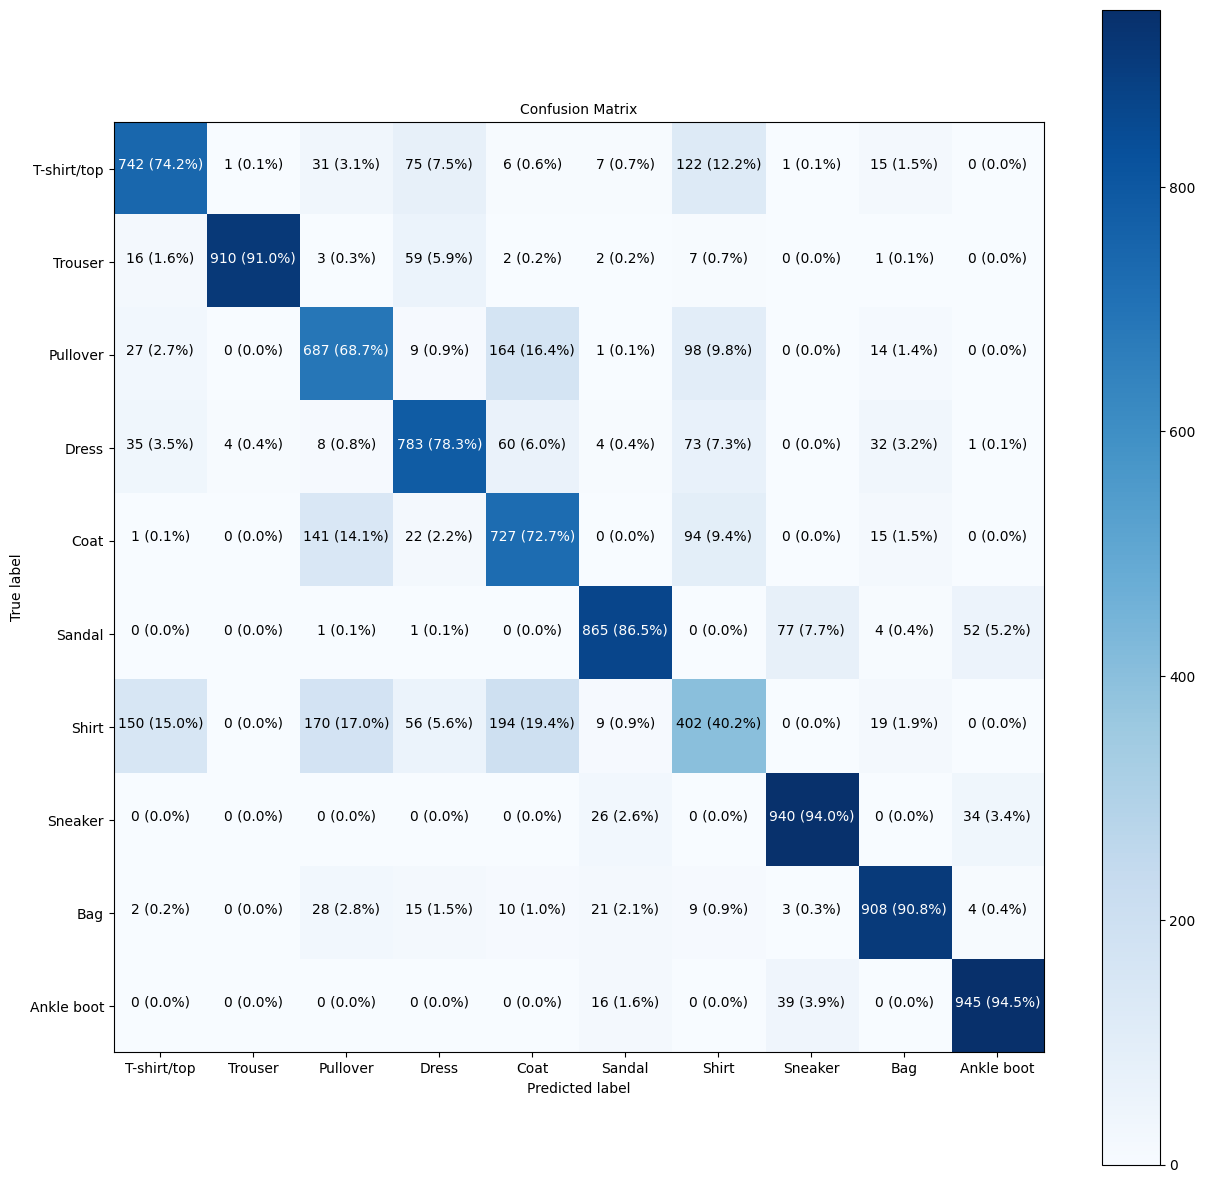

In [ ]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

### Part 9: Visualizing random model predictions

> **Note:** Often when working with images and other forms of visual data, it's a good idea to visualize as much as possbile to develop a further understanding of the data and the inputs and outputs of your models.

How about we create a fun little function for:
* Plot a random image
* Make a prediction on said image
* Label the plot with the truth label & the predicted label

In [ ]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image, plots it and labels it with a prediction and truth label.
  """

  # setup random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # pass 1 image at a time
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on the if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red based on if prediction is right or wrong

1/1 [==============================] - 0s 34ms/step


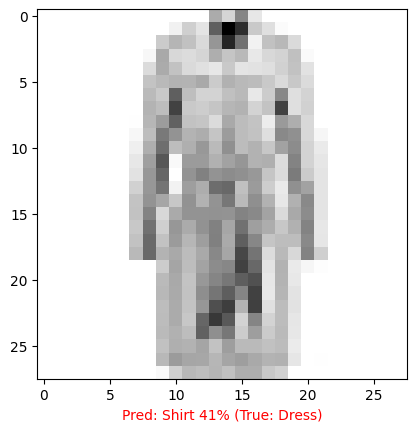

In [ ]:
# Check out a random image as well as its prediction
plot_random_image(model=model_14,
                  images=test_data_norm, # always make predictions on the same kind of data your model was trained on
                  true_labels=test_labels,
                  classes=class_names)

### What "patterns" is our model learning?


In [ ]:
# Find the layers of our most recent model
model_14.layers

In [ ]:
# Extract a particular layer
model_14.layers[1]

In [ ]:
# Get the patterns of a layer in our network
weights, biases = model_14.layers[1].get_weights()

# Shapes
weights, weights.shape

(array([[-0.0406721 ,  0.06401961, -0.417363  ,  0.13177632],
        [ 0.00697075,  0.44935533, -0.43070588,  0.270461  ],
        [-0.24506032,  0.9276214 , -0.7439084 ,  0.4043101 ],
        ...,
        [ 0.3117454 ,  0.49530545,  0.04751473, -0.8697883 ],
        [-0.67514074,  0.19337694,  0.18724462, -0.263     ],
        [-0.60340935, -0.21354865, -0.01674473,  0.06390839]],
       dtype=float32),
 (784, 4))

In [ ]:
28 * 28

784

In [ ]:
model_14.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_35 (Dense)            (None, 4)                 3140      
                                                                 
 dense_36 (Dense)            (None, 4)                 20        
                                                                 
 dense_37 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Now let's check out the bias vector...

In [ ]:
# Bias and biases shapes
biases, biases.shape

(array([2.5868857 , 0.28809634, 0.24339704, 0.93661004], dtype=float32), (4,))

Every neuron has a bias vector. Each of these is paired with a weights matrix.

The bias vector gets initialized as zeros (at least in the case of a TensorFlow Dense layer).

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next year.

In [ ]:
model_14.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_35 (Dense)            (None, 4)                 3140      
                                                                 
 dense_36 (Dense)            (None, 4)                 20        
                                                                 
 dense_37 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


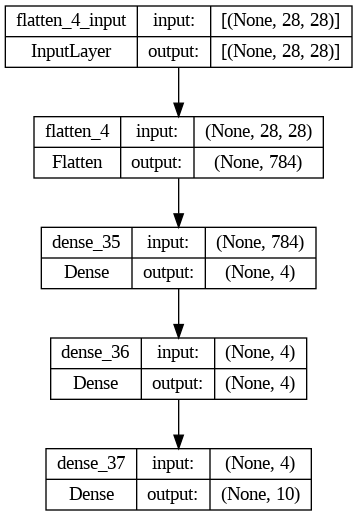

In [ ]:
# Let's check out another way of viewing our deep learning models
from tensorflow.keras.utils import plot_model
# See the inputs and outputs of each layer
plot_model(model_14, show_shapes=True)

# Next: Checkout the exercises and extra curriculum...